## Use Glove in Pytorch to Finish NLP task - sentiment analysis
Presented by: Shunlin Lu   
Contact: lushunlin@cuhk.edu.cn or you can find me in the Wechat group chat.

Word embeddings can provide more meaningful vector representations of words. Using pre-trained word embeddings in NLP tasks can greatly improve training efficiency. In this tutorial, I will share with you how to use pre-trained **GloVe** word embeddings in PyTorch and use them to complete a simple NLP task - sentiment analysis.

## Glove Word Embedding


GloVe is an **unsupervised learning algorithm** for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase **interesting linear substructures** of the word vector space.



*   Wikipedia+gigaword（6B）
*   crawler（42B）
*   crawler（840B）
*   twitter(27B)




According to the size of the word embedding vector, it can be divided into different dimensions such as 50 dims, 100 dims, 200 dims, etc.

We do not need to GloVe on our own, we can use official glove.

In [1]:
import torchtext

In [2]:
import torch
from torchtext.vocab import GloVe # GloVe is well embedded in the torchtext package, easy to use

In [3]:
glove = GloVe(name='6B', dim=100)

.vector_cache/glove.6B.zip: 862MB [03:32, 4.06MB/s]                           
100%|█████████▉| 399999/400000 [00:15<00:00, 25189.61it/s]


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
%cd /gdrive/MyDrive/Colab_Notebooks/tutorials


/gdrive/MyDrive/Colab_Notebooks/tutorials


In [6]:
!pwd

/gdrive/MyDrive/Colab_Notebooks/tutorials


In [7]:
! ls

 aclImdb_v1.tar.gz		 torch_pip.png		 tutorial_4.ipynb
 anaconda_install.png		 tutorial_1.ipynb	 Untitled0.ipynb
 MMClassification_python.ipynb	'tutorial_2 (1).ipynb'
 torch_conda.png		 tutorial_2.ipynb


In [8]:
# Get vectors
tensor = glove.get_vecs_by_tokens(['', '1998', '199999998', ',', 'cat'], True)
print(tensor)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  

This function provided by PyTorch is very convenient. If the token is not in GloVe, the function will return a vector of all zeros. If you run the above code, you can observe something interesting: the empty string and uncommon numbers like 199999998 are not in the vocabulary, while the common numbers like 1998 and punctuation are in the vocabulary.

The GloVe class internally maintains a matrix, an array of vectors for each word. Therefore, GloVe needs a **mapping table** to map words to vector array indexs. **glove.itos** and **glove.stoi** complete the mapping between indexs and word strings. For example, with the following code, we can know the size of the vocabulary and access the first few words of the vocabulary:

In [9]:
myvocab = glove.itos
print(len(myvocab))
print(myvocab[0], myvocab[1], myvocab[2], myvocab[3])

400000
the , . of


Let's understand the meaning of word embedding through a practical example. Word embeddings are vectors, and the relationship between the vectors often corresponds to the semantic relationship. Using the relative relationship of word embeddings, we can answer the question "x1 is to y1, who is x2 to?". For example, if a man is to a woman, then a king is to a queen. Suppose the vector we are looking for is y2, we want x1-y1=x2-y2, that is, find a vector y2 that is closest to x2-(x1-y1). This process can be described by the following code. 

In [10]:
def get_counterpart(x1, y1, x2):
    """Find y2 that makes x1-y1=x2-y2"""
    x1_id = glove.stoi[x1]
    y1_id = glove.stoi[y1]
    x2_id = glove.stoi[x2]
    x1, y1, x2 = glove.get_vecs_by_tokens([x1, y1, x2], True)
    target = x2 - x1 + y1
    max_sim = 0
    max_id = -1
    for i in range(len(myvocab)):
        vector = glove.get_vecs_by_tokens([myvocab[i]], True)[0]
        cossim = torch.dot(target, vector)
        if cossim > max_sim and i not in {x1_id, y1_id, x2_id}:
            max_sim = cossim
            max_id = i
    return myvocab[max_id]


print(get_counterpart('man', 'woman', 'king'))
print(get_counterpart('more', 'less', 'long'))
print(get_counterpart('apple', 'red', 'banana'))

queen
short
yellow


In [ ]:
# ! tar -xvf "/gdrive/MyDrive/Colab_Notebooks/tutorials/aclImdb_v1.tar.gz" -C "/gdrive/MyDrive/Colab_Notebooks/tutorials/"

The sentiment analysis task is a relatively simple two-category NLP task: given a passage, whether the sentiment of the output passage is positive or negative.


*   **Positive**: I went and saw this movie last night after being coaxed to by a few friends of mine. I’ll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer **very well**, and Kevin Costner played Ben Randall with such professionalism.
*   **Negative**: This is a pale imitation of 'Officer and a Gentleman.' There is **NO chemistry** between Kutcher and the unknown woman who plays his love interest. The dialog is **wooden**, the situations **hackneyed**.



These reviews are selected from a large dataset of movies from Stanford University. It contains movie reviews on **IMDb**. This data set is the most commonly used data set in sentiment analysis, and most beginers will use it to train a sentiment analysis model when learning NLP.

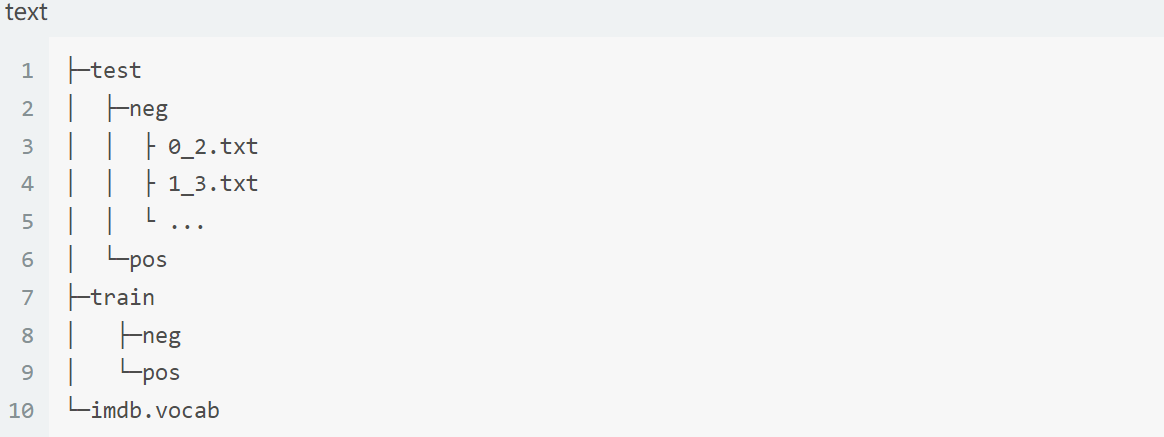

In [12]:
import os
def read_imdb(dir='aclImdb', split='pos', is_train=True):
    subdir = 'train' if is_train else 'test'
    dir = os.path.join(dir, subdir, split)
    lines = []
    for file in os.listdir(dir):
        with open(os.path.join(dir, file), 'rb') as f:
            line = f.read().decode('utf-8')
            lines.append(line)
    return lines

In [13]:
from torchtext.data import get_tokenizer

tokenizer = get_tokenizer('basic_english')
print(tokenizer('a, b'))

['a', ',', 'b']


In [14]:
from torchtext.data import get_tokenizer
lines = read_imdb()
print('Length of the file:', len(lines))
print('lines[0]:', lines[0])
tokenizer = get_tokenizer('basic_english')
tokens = tokenizer(lines[0])
print('lines[0] tokens:', tokens)

Length of the file: 12500
lines[0]: Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn't really understand, and whose naivety is all the more striking in contrast with the natives.<br /><br />But I'd have to say that The Third Man has a more well-crafted storyline. Zentropa is a bit disjointed in this respect. Perhaps this is intentional: it is presented as a dream/nightmare, and making it too coherent would spoil the effect. <br /><br />This movie is unrelentingly grim--"noir" in more than one sense; one never sees the sun shine. Grim, but intriguing, and frightening.
lines[0] tokens: ['zentropa', 'has', 'much', 'in', 'common', 'with', 'the', 'third', 'man', ',', 'another', 'noir-like', 'film', 'set', 'among', 'the', 'rubble', 'of', 'postwar', 'europe', '.', 'like', 'ttm', ',', 'there', 'is', 'much'

In [15]:
from torch.utils.data import DataLoader, Dataset
from torchtext.data import get_tokenizer
from torchtext.vocab import GloVe


GLOVE_DIM = 100
GLOVE = GloVe(name='6B', dim=GLOVE_DIM)


class IMDBDataset(Dataset):
    def __init__(self, is_train=True, dir='data/aclImdb'):
        super().__init__()
        self.tokenizer = get_tokenizer('basic_english')
        pos_lines = read_imdb(dir, 'pos', is_train)
        neg_lines = read_imdb(dir, 'neg', is_train)
        self.lines = pos_lines + neg_lines
        self.pos_length = len(pos_lines)
        self.neg_length = len(neg_lines)

    def __len__(self):
        return self.pos_length + self.neg_length

    def __getitem__(self, index):
        sentence = self.tokenizer(self.lines[index])
        x = GLOVE.get_vecs_by_tokens(sentence)
        label = 1 if index < self.pos_length else 0
        return x, label

.vector_cache/glove.6B.zip: 862MB [05:07, 2.81MB/s]                           
100%|█████████▉| 399999/400000 [00:15<00:00, 25653.45it/s]


When PyTorch DataLoader obtains a batch of Dataset data, it actually calls **Dataset.\_\_getitem\_\_** first to obtain several samples, and then stitches all the samples into a batch. For example, use **\_\_getitem\_\_** to obtain 4 image tensors of [3, 10, 10], and then stitch them into a batch of [4, 3, 10, 10]. However, sequence data usually have different lengths, and **\_\_getitem\_\_** may obtain word embedding arrays of unequal lengths such as [10, 100], [15, 100].

To solve this problem, we have to manually write a function that combines all tensors into a batch. This function is the **collate_fn** function of DataLoader. Our **collate_fn** should be written like this:

In [ ]:
def collate_fn(batch):
    x, y = zip(*batch)
    x_pad = pad_sequence(x, batch_first=True)
    y = torch.Tensor(y)
    return x_pad, y

The input batch of collate_fn is an array of the results of each \_\_getitem\_\_. For example, in our tutorial, for the first time to obtain a positive sentence of length 10, __getitem__ returns (Tensor[10, 100], 1); for the second time to obtain a negative sentence of length 15, __getitem_ _ returns (Tensor[15, 100], 0). Then, the content of the input batch is: [(Tensor[10, 100], 1), (Tensor[15, 100], 0)]  

We can neatly convert this into two tuples with x, y = zip(*batch):x = (Tensor[10, 100], Tensor[15, 100]), y = (1, 0)  

After that, PyTorch's pad_sequence can fill the array of unequal-length sequences into a whole batch tensor according to the maximum length. That is, after this function, x_pad becomes: x_pad = Tensor[2, 15, 100]

The batch_first of pad_sequence determines whether the batch is in the first dimension. If it is False, the resulting tensor has shape [15, 2, 100].

pad_sequence can also determine the padding content, and the default padding is 0. 


 

In [19]:
import torch
from torch.nn.utils.rnn import pad_sequence

def get_dataloader(dir='aclImdb'):
    def collate_fn(batch):
        x, y = zip(*batch)
        x_pad = pad_sequence(x, batch_first=True)
        y = torch.Tensor(y)
        return x_pad, y

    train_dataloader = DataLoader(IMDBDataset(True, dir),
                    batch_size=32,
                    shuffle=True,
                    collate_fn=collate_fn)
    test_dataloader = DataLoader(IMDBDataset(False, dir),
                    batch_size=32,
                    shuffle=True,
                    collate_fn=collate_fn)
    return train_dataloader, test_dataloader

In [22]:
from torch import nn
class RNN(torch.nn.Module):
    def __init__(self, hidden_units=64, dropout_rate=0.5):
        super().__init__()
        self.drop = nn.Dropout(dropout_rate)
        self.rnn = nn.GRU(GLOVE_DIM, hidden_units, 1, batch_first=True)
        self.linear = nn.Linear(hidden_units, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x: torch.Tensor):
        # x shape: [batch, max_word_length, embedding_length]
        emb = self.drop(x)
        output, _ = self.rnn(emb)
        output = output[:, -1]
        output = self.linear(output)
        output = self.sigmoid(output)

        return output

In [23]:
device = 'cuda:0'
train_dataloader, test_dataloader = get_dataloader()
model = RNN().to(device)

In [24]:
# train

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
citerion = torch.nn.BCELoss()
for epoch in range(100):

    loss_sum = 0
    dataset_len = len(train_dataloader.dataset)

    for x, y in train_dataloader:
        batchsize = y.shape[0]
        x = x.to(device)
        y = y.to(device)
        hat_y = model(x)
        hat_y = hat_y.squeeze(-1)
        loss = citerion(hat_y, y)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        loss_sum += loss * batchsize

    print(f'Epoch {epoch}. loss: {loss_sum / dataset_len}')

torch.save(model.state_dict(), 'rnn.pth')


Epoch 0. loss: 0.693356454372406
Epoch 1. loss: 0.6922003030776978
Epoch 2. loss: 0.6914392709732056
Epoch 3. loss: 0.6900927424430847
Epoch 4. loss: 0.6805782914161682
Epoch 5. loss: 0.6111732125282288
Epoch 6. loss: 0.5910208821296692
Epoch 7. loss: 0.5833805799484253
Epoch 8. loss: 0.5717023611068726
Epoch 9. loss: 0.558423638343811
Epoch 10. loss: 0.4685986340045929
Epoch 11. loss: 0.3883166015148163
Epoch 12. loss: 0.3614780306816101
Epoch 13. loss: 0.34228795766830444
Epoch 14. loss: 0.33467090129852295
Epoch 15. loss: 0.32108187675476074
Epoch 16. loss: 0.31699514389038086
Epoch 17. loss: 0.3083746135234833
Epoch 18. loss: 0.3064505457878113
Epoch 19. loss: 0.30145829916000366
Epoch 20. loss: 0.29421865940093994
Epoch 21. loss: 0.29283273220062256
Epoch 22. loss: 0.28593602776527405
Epoch 23. loss: 0.280355304479599
Epoch 24. loss: 0.27865269780158997
Epoch 25. loss: 0.2776602804660797
Epoch 26. loss: 0.274476557970047
Epoch 27. loss: 0.2708249092102051
Epoch 28. loss: 0.2720730

In [25]:
# test

# model.load_state_dict(
#     torch.load('rnn.pth', 'cuda:0'))

accuracy = 0
dataset_len = len(test_dataloader.dataset)
model.eval()
for x, y in test_dataloader:
    x = x.to(device)
    y = y.to(device)
    with torch.no_grad():
        hat_y = model(x)
    hat_y.squeeze_(1)
    predictions = torch.where(hat_y > 0.5, 1, 0)
    score = torch.sum(torch.where(predictions == y, 1, 0))
    accuracy += score.item()
accuracy /= dataset_len

print(f'Accuracy: {accuracy}')

Accuracy: 0.9138


## Other useful tools: Hugging face https://huggingface.co/


So many interesting open-source models, like GPT-2, CLIP, BERT, T5 Language model,etc. And it is easy to use.

In [27]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.8 MB/s eta 0:00:00


In [28]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)


/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]